Development of optimisation code

In [1]:
import sys
sys.path.append('/Users/simon/git/molnet/code/')

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from mnet import *

In [139]:
input_file = '/Users/simon/Downloads/StrathMSOptimisation_KRD171_ISP3/140818_AH_KRD171_ISP3.mzML'

Load the file

In [140]:
l = MNetLoadMZML(input_file,mz_tolerance = 0.2,rt_tolerance = 5,get_groups = True)
ms1,spectra = l.load_spectra()

Loading spectra from /Users/simon/Downloads/StrathMSOptimisation_KRD171_ISP3/140818_AH_KRD171_ISP3.mzML
Loaded 3044 spectra
After duplicate filtering, 1031 spectra remain


Do the initial filtering -- we're not optimising these bits

In [141]:
for s in spectra:
    s.remove_precursor_peak()
    s.keep_top_k()

In [142]:
from mnet_utilities import optimise_noise_thresh
from scoring_functions import *
ms2_vals = [0,1000,2000,3000,4000,5000,6000,7000,10000]
min_match_vals = [1,2,3,4,5,6]
all_pos_curves,all_neg_curves,all_auc_vals = optimise_noise_thresh(l.groups,fast_cosine,0.2,min_match_vals = min_match_vals,ms2_vals = ms2_vals,n_pairs = 1000)



(2000,)
(2000,)
(2000,)
(2000,)
(2000,)
(2000,)


0.8848450000000001
0.8862960000000001
0.884361
0.878847
0.8755645
0.8725769999999999


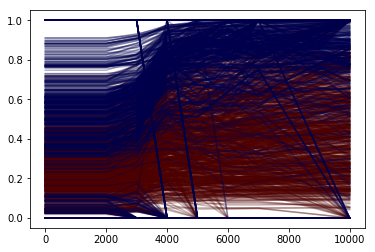

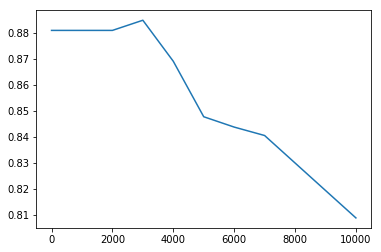

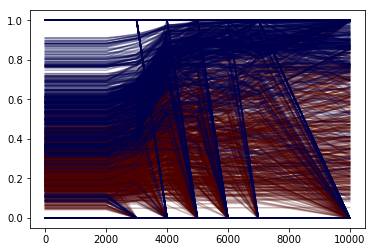

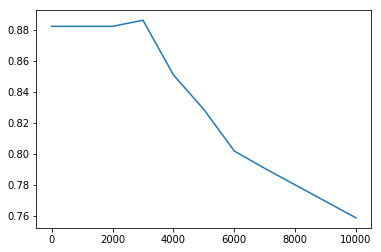

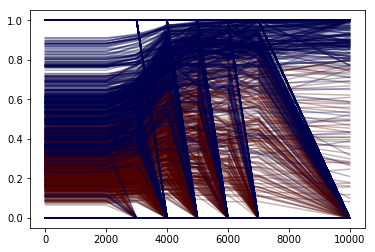

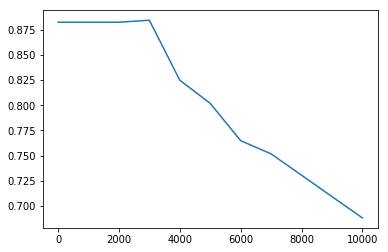

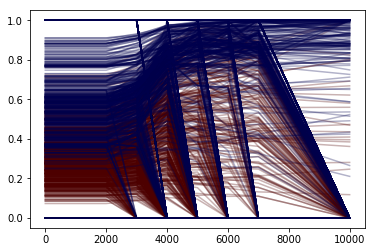

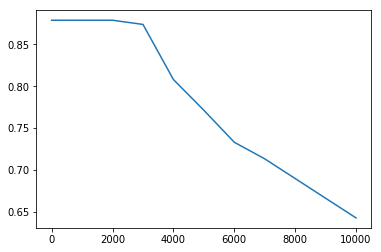

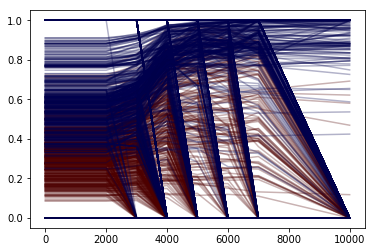

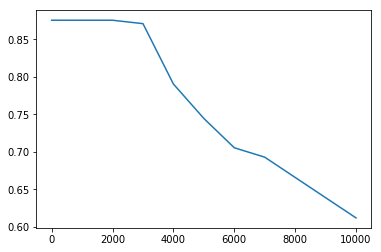

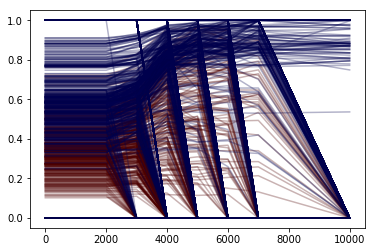

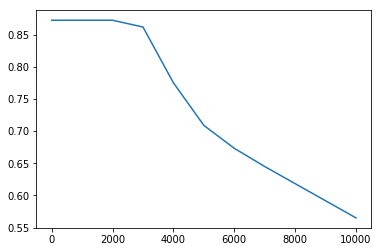

In [143]:
import pylab as plt
import numpy as np
%matplotlib inline
for i,m in enumerate(min_match_vals):
    plt.figure()
    plt.plot(ms2_vals,np.array(all_neg_curves[i]).T,color=[0.3, 0,0,0.3])
    plt.plot(ms2_vals,np.array(all_pos_curves[i]).T,color=[0.0, 0.0, 0.3, 0.3])
    plt.figure()
    plt.plot(ms2_vals,all_auc_vals[i])
    print max(all_auc_vals[i])



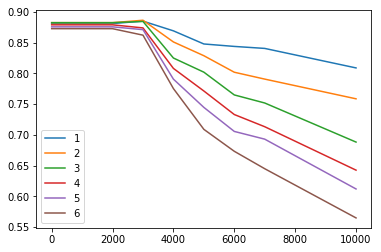

In [144]:
plt.figure()
handles = []
for i,a in enumerate(all_auc_vals):
    h, = plt.plot(ms2_vals,a,label = min_match_vals[i])
    handles.append(h)
plt.legend(handles = handles)